Data Source: http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
from scipy import stats  
from scipy.stats import multivariate_normal
import re
import glob
%matplotlib inline

In [2]:
def read_images(data_path,target_folders,label_1_folder):
    """
    This function reads in all images inside the specified folders, and label the images based on label_1_folder
    data_path: the path of the folder where all the image folders reside in
    target_folders: the target_folders to be read from
    label_1_folder: images in the specified folders will be labeled with 1
    """
    # label_1_folder = [9,21]
    folder_paths = glob.glob(data_path + "*")
    images = [] # Initialize a list to record images
    labels = [] # Initialize a list to record labels
    for folder_path in folder_paths:
        index = int(folder_path[-2:]) # Get the index embeded in the folder path
        if index in target_folders:
            # Assign labels
            if index in label_1_folder:
                label =1
            else:
                label = 0

            # Read in images and corresponding labels
            img_paths = glob.glob(folder_path + "/*.pgm")
            for img_path in img_paths: 
                if img_path.find("Ambient")>0:
                    img_paths.remove(img_path) # We do not want the "Ambient" image because it is a profile picture
                else:
                    img = plt.imread(img_path)
                    images.append(img)
                    labels.append(label)
    return images,labels


def dark_pixel_curve(images,light_threshold = 20):
    """
    Images are taken at different lighting conditions; thus some of the photos are dark. In order to avoid 
    the impact of the bad lighting conditions, we need to remove photos with large number of dark pixels. 
    This curve shows us the number of images to be removed at different thresholds (total number of pixels 
    that are below 20 in one image). It can help us select an appropriate threshold. 
    """
    height, width = images[0].shape # Get the dimension of one image
    thresh_list = range(100,height*width,100) # Threshold levels to be tested: from 100 to the total pixels
    remove_list = []
    for dark_pixel_threshold in thresh_list:
        remove_count = 0
        for i in range(0,images_num):
            if sum(sum(images[i] < light_threshold)) > dark_pixel_threshold:
                remove_count = remove_count + 1
        remove_list.append(remove_count)
    
    plt.plot(thresh_list,remove_list)
    plt.xlabel("Number of dark pixels in an image")
    plt.ylabel("Number of images to be removed from the list")
    plt.title("Select the right threshold level")
    
def remove_dark_img(imgs,labels,dark_pixel_threshold,light_threshold = 20):
    """
    This function remove images that have more dark pixels (<20) than our threshold
    """
    remove_count = 0
    imgs_num = len(imgs)
    for i in range(imgs_num-1,0-1,-1):
        if sum(sum(imgs[i] < light_threshold)) > dark_pixel_threshold:
            del imgs[i]
            del labels[i]
            remove_count = remove_count + 1
    print "%(count)d images are below our threshold and thus removed from the list" % {"count": remove_count}
    return imgs,labels,remove_count

def plot_images(imgs,labels):
    """
    Plot 25 images selected randomly
    """
    ind = np.random.permutation(len(imgs))

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(5, 5,figsize=(15,15))
    fig.subplots_adjust(hspace=0.1, wspace=0.01)

    for i, ax in enumerate(axes.flat): 
        ax.imshow(imgs[ind[i]], plt.cm.gray)
        xlabel = "Anomaly: {0}".format(labels[ind[i]])
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

def show_anomaly_images(images,labels):
    """
    This function randomly show 9 images with label 1
    """
    anomaly_label_index = np.asarray(np.where(labels)).reshape(-1) # Get the indice of anomaly
    anomaly_image = [images[i] for i in anomaly_label_index] # Extract the images labeled as anomaly
    anomaly_label = [labels[i] for i in anomaly_label_index] # Extract the images labeled as anomaly
    plot_images(anomaly_image,anomaly_label) # Show 9 images randomly

In [3]:
# Read in the images and labels
label_1_folder = [9,21]
target_folders = range(1,22)
data_path = "CroppedYale/"
images,labels = read_images(data_path,target_folders,label_1_folder)

# Number of labels as "Anomaly" and Total Number of Labels
sum(labels),len(labels)

(126, 1243)

585 images are below our threshold and thus removed from the list


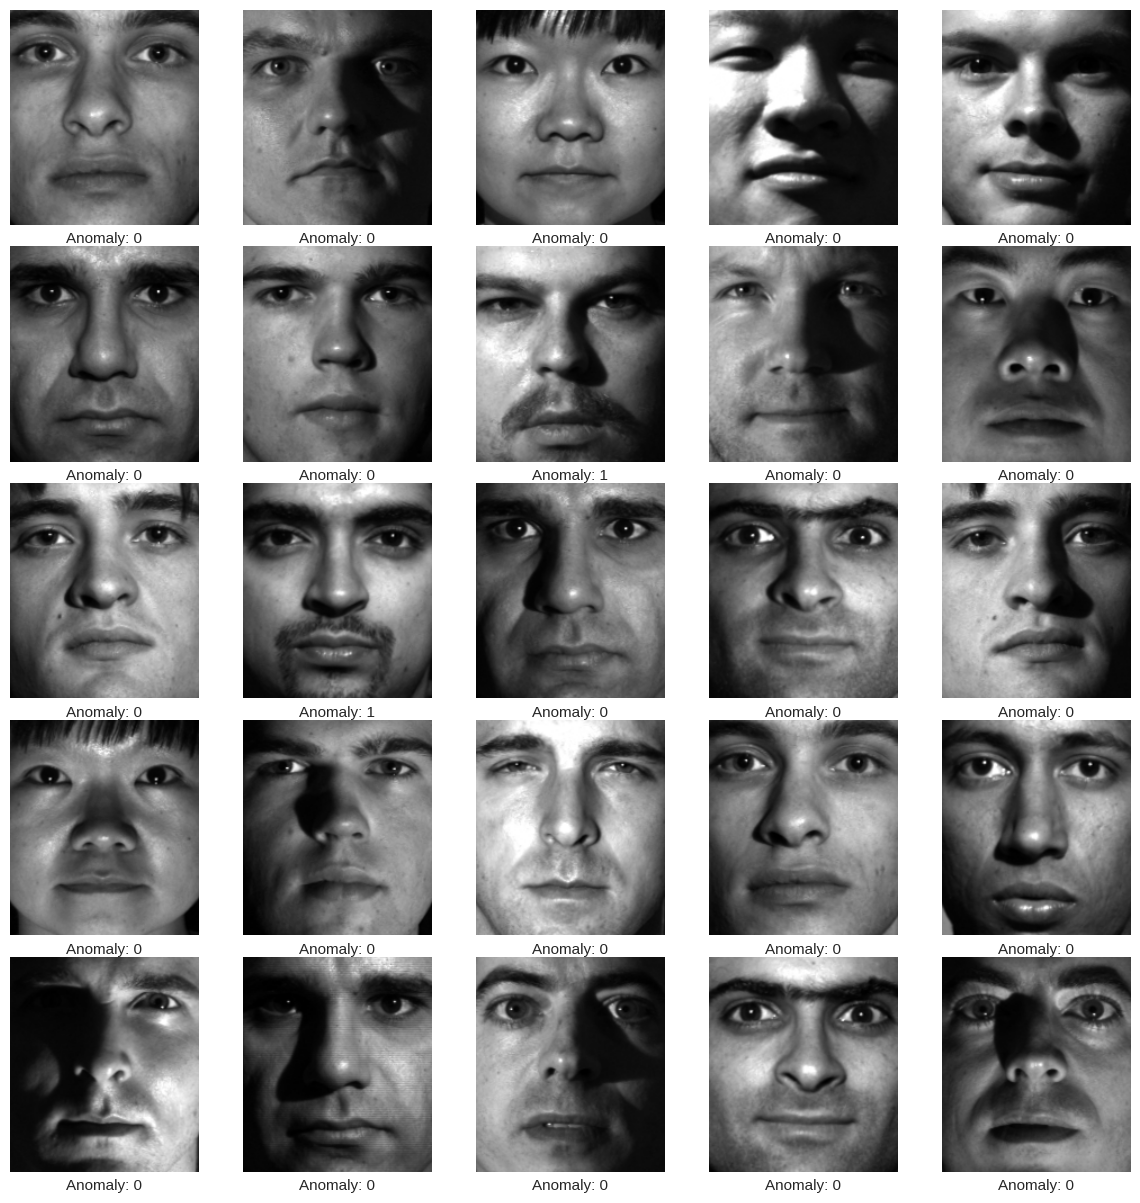

In [4]:
# To evaluate the threshold of the dark pixels
# dark_pixel_curve(images)

imgs = images[:] # Create a copy
# Eliminate the images and labels whose number of dark pixels are above the threshold
imgs,labels,remove_count = remove_dark_img(imgs,labels,12000) 

plot_images(imgs,labels)

In [ ]:
# Randomly select and show anomalous images
show_anomaly_images(imgs,labels)